Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import pandas as pd

df_foursquare = pd.read_csv("../data/foursquare_features.csv")
df_yelp = pd.read_csv("../data/yelp_features.csv")
df2 = pd.read_csv("../data/montreal_city_bikes.csv")

df_poi = pd.merge(df_foursquare, df_yelp, on=['Latitude','Longitude'])
df_all = pd.merge(df_poi, df2, on=['Latitude','Longitude'])
df_all

,Latitude,Longitude,Average_dist_F,Average_popularity_F,Average_rating_F,Max_rating_F,Max_popularity_F,Min_rating_F,Min_popularity_F,Average_distance_Y,Average_review_count_Y,Average_rating_Y,Max_rating_Y,Max_review_count,Min_rating_Y,Min_review_count,Station Name,Number of Bikes
0,45.516926,-73.564257,689.060000,0.938463,8.606,9.5,0.997731,8.0,0.302754,768.125648,50.320000,4.670000,5.0,503,4.5,3,Gare d'autocars de Montréal (Berri / Ontario),12
1,45.553219,-73.539782,893.346939,0.804348,NaN,9.0,0.992079,5.6,0.073790,604.619033,17.660000,4.240000,5.0,159,3.5,1,Marché Maisonneuve,8
2,45.526890,-73.572640,720.760000,0.941647,8.460,9.4,0.999622,7.3,0.475590,809.326029,19.280000,4.610000,5.0,97,4.5,3,Rachel / de Brébeuf,7
3,45.553400,-73.662255,696.040000,0.772542,NaN,8.3,0.994869,6.1,0.009805,716.837299,5.708333,3.468750,4.5,29,2.0,1,Bibliothèque d'Ahuntsic (Lajeunesse / Fleury),8
4,45.559842,-73.615447,883.535714,0.757223,NaN,8.1,0.999065,6.2,0.042997,807.769747,7.000000,3.153846,5.0,28,1.0,1,Cité des Arts du Cirque (Paul Boutet / des Reg...,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,45.489525,-73.584458,649.179487,0.816851,NaN,9.4,0.997845,6.4,0.059275,773.859825,42.980000,4.560000,5.0,720,4.5,3,Métro Atwater (Atwater / Ste-Catherine),11
156,45.507885,-73.563151,662.480000,0.949826,8.950,9.5,0.999122,8.6,0.302754,740.716920,42.540000,4.650000,5.0,503,4.5,3,Complexe Desjardins (St-Urbain / René-Lévesque),31
157,45.496496,-73.578704,515.320000,0.976412,8.604,9.4,0.999565,8.1,0.709264,542.955093,19.880000,4.580000,5.0,126,4.5,3,de Maisonneuve / Mackay,17
158,45.529337,-73.577953,770.120000,0.833648,NaN,9.5,0.999622,6.3,0.002926,658.622691,60.200000,4.590000,5.0,1270,4.5,3,du Mont-Royal / de Brébeuf,0


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

/Users/selwynreuangrith/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


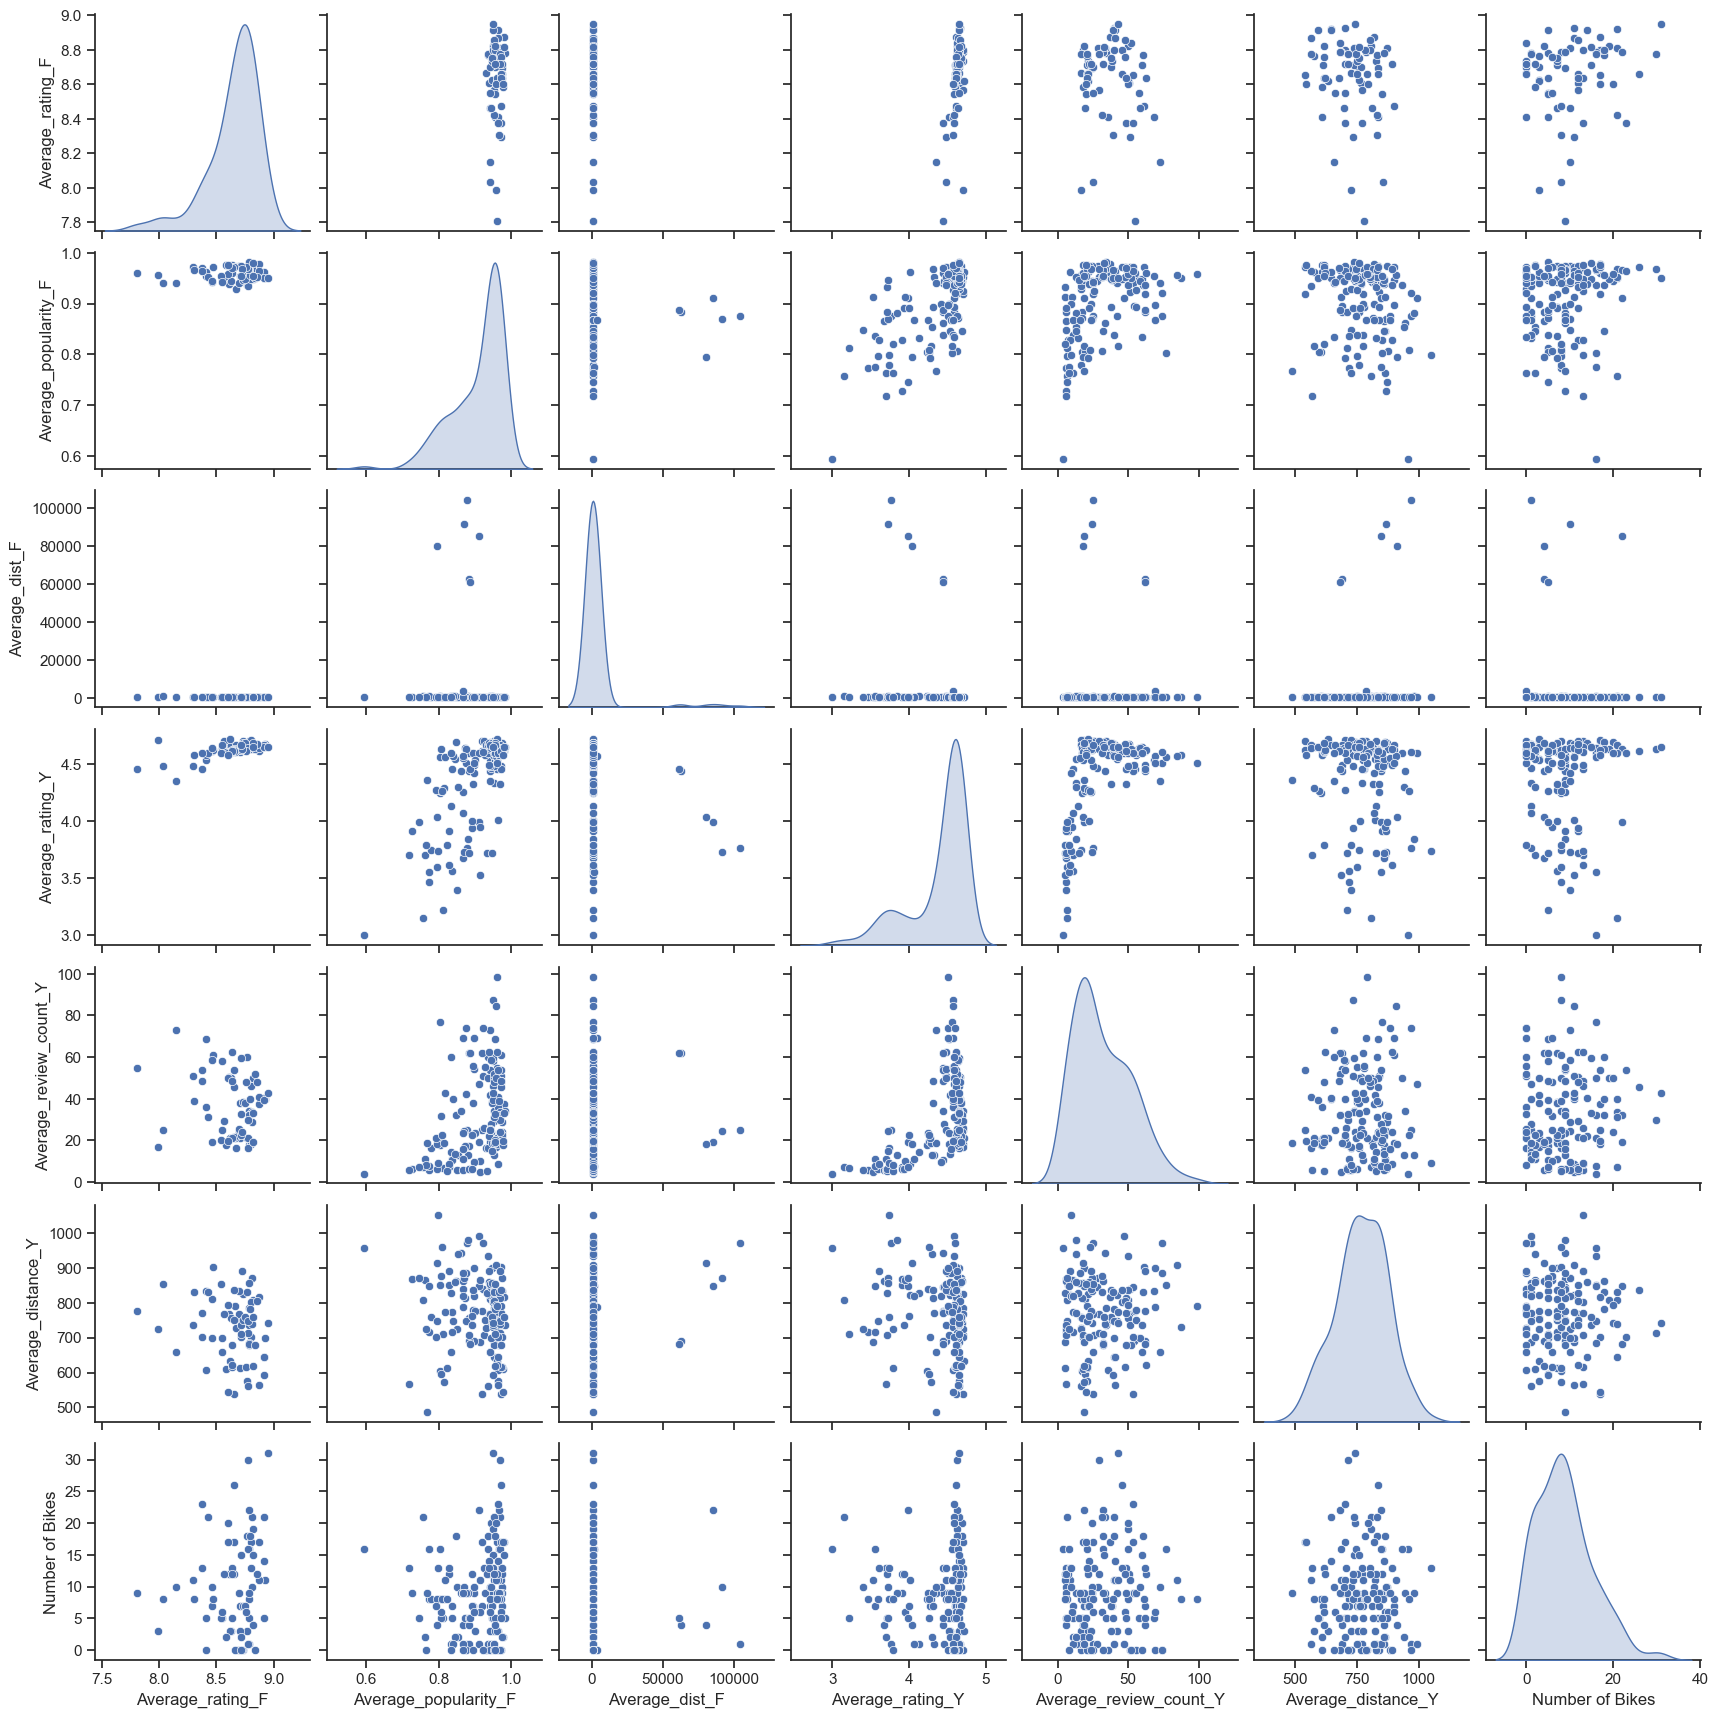

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", color_codes=True)
sns.pairplot(df_all, diag_kind="kde", vars=['Average_rating_F','Average_popularity_F','Average_dist_F','Average_rating_Y','Average_review_count_Y','Average_distance_Y','Number of Bikes'])
plt.savefig('../images/pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

# plt.savefig('../images/pairplot.jpg', dpi=300, bbox_inches='tight')

df_features = df_all[['Average_rating_F','Average_popularity_F','Average_dist_F','Average_rating_Y','Average_review_count_Y','Average_distance_Y','Number of Bikes']]

In [3]:
# Specify the file path for the CSV
csv_file_path = "../data/features.csv"

# Save the DataFrame to CSV
df_features.to_csv(csv_file_path, index=False)

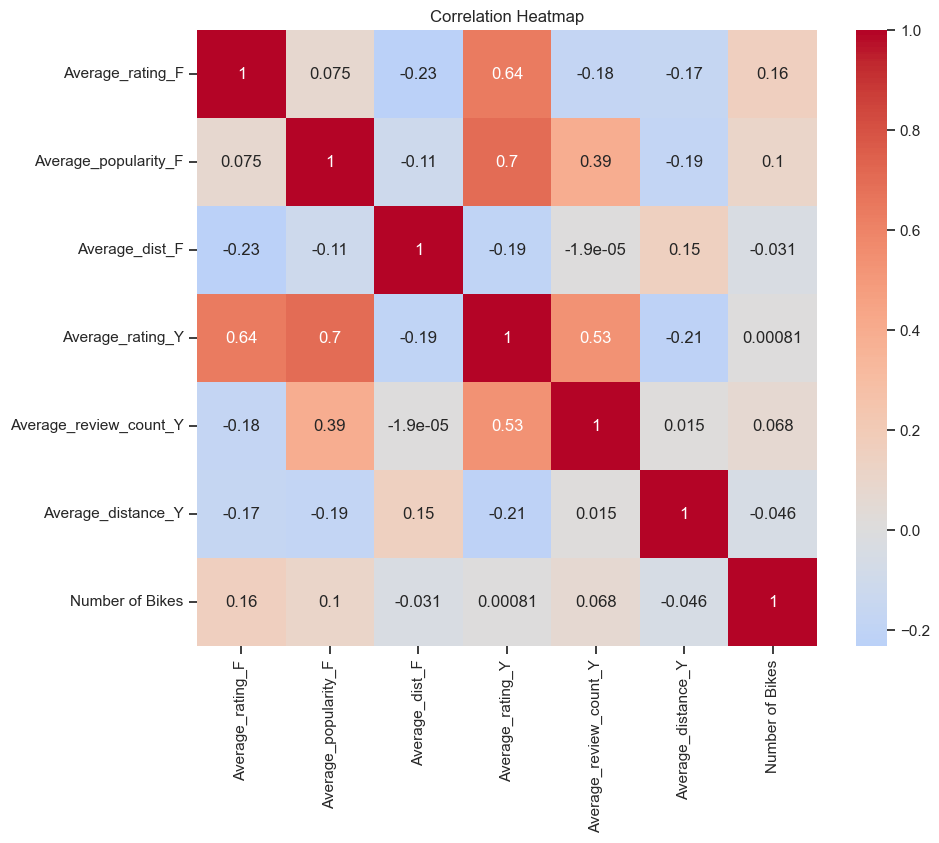

In [4]:
correlation_matrix = df_features.corr(numeric_only=True)
correlation_matrix

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title("Correlation Heatmap")
plt.savefig('../images/heatmap.jpg', dpi=300, bbox_inches='tight')
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [5]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

connection = create_connection("../data/bikes_poi.sqlite")

# Write the DataFrames to the database
df_foursquare.to_sql('foursquare', connection, if_exists='replace', index=False)
df_yelp.to_sql('yelp', connection, if_exists='replace', index=False)
df2.to_sql('bikes', connection, if_exists='replace', index=False)

# Close the database connection
connection.close()

Connection to SQLite DB successful


Look at the data before and after the join to validate your data.

In [6]:
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

connection = create_connection("../data/bikes_poi.sqlite")

select_bikes = "SELECT * FROM bikes"
bikes = execute_read_query(connection, select_bikes)

for station in bikes:
    print(station)

connection.close()

Connection to SQLite DB successful
("Gare d'autocars de Montréal (Berri / Ontario)", 45.516926210319546, -73.56425732374191, 12)
('Marché Maisonneuve', 45.55321884238814, -73.53978216648102, 8)
('Rachel / de Brébeuf', 45.52689, -73.57264, 7)
("Bibliothèque d'Ahuntsic (Lajeunesse / Fleury)", 45.5534000891078, -73.66225451231003, 8)
('Cité des Arts du Cirque (Paul Boutet / des Regrattiers)', 45.55984236120471, -73.61544728279114, 21)
('Omer-Lavallée / du Midway', 45.5457759528664, -73.56217458844185, 2)
('Papineau / Émile-Journault', 45.55988367688166, -73.63356828689575, 16)
('CHSLD St-Michel (8e avenue / Jarry)', 45.5616903, -73.610512, 5)
('Chabanel / du Parc', 45.53830765459552, -73.6548838019371, 11)
('Métro Henri-Bourassa (Henri-Bourassa / Millen)', 45.55675103297278, -73.66716161370277, 11)
('Calixa-Lavallée / Rachel', 45.52783154456306, -73.5719096660614, 0)
('Marché Jean-Talon (Casgrain / Shamrock)', 45.53519006163501, -73.61548215150833, 17)
('Fabrik8 (Waverly / Jean-Talon)', 4